In [33]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

In [34]:
dt = pd.read_csv('card_transdata.csv')
dt.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [35]:
dt.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

<AxesSubplot:>

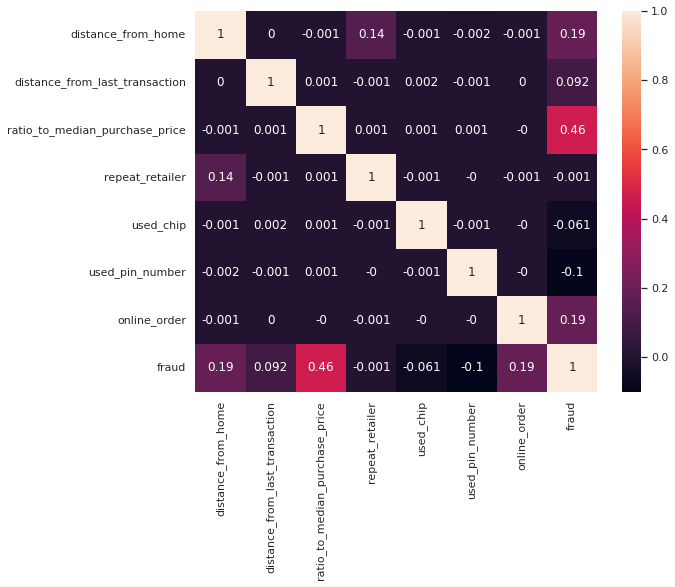

In [36]:
sns.set(rc = {'figure.figsize':(9,7)})
sns.heatmap(round(dt.corr(),3), annot=True)

In [37]:
dt.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [38]:
data = np.asarray(dt['fraud']).reshape(1000000, 1)

checking the distribution of frauds in the dataset:

<AxesSubplot:>

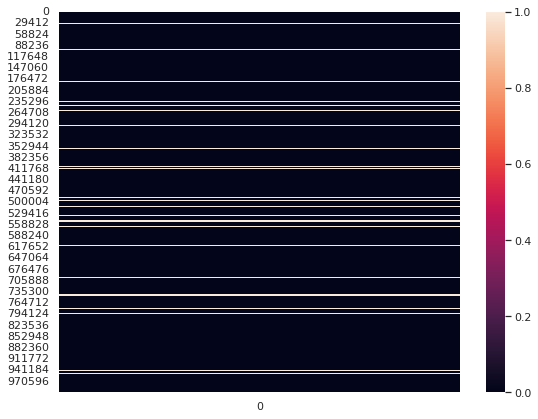

In [39]:
sns.heatmap(data)

In [40]:
dt = dt.iloc[:50000]

In [41]:
dt.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [42]:
dt.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,26.979933,5.164165,1.799510,0.885020,0.350680,0.103280,0.650880,0.086340
std,68.502716,26.713719,2.689812,0.319001,0.477188,0.304327,0.476697,0.280868
min,0.021322,0.000705,0.011373,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.905343,0.296871,0.474524,1.000000,0.000000,0.000000,0.000000,0.000000
50%,10.047077,0.997287,0.993814,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.970365,3.367123,2.075260,1.000000,1.000000,0.000000,1.000000,0.000000
max,4601.011222,2160.499922,67.601896,1.000000,1.000000,1.000000,1.000000,1.000000


removing outliers for a better graphic visualization:

In [43]:
dt = dt[dt.distance_from_home < 50]
dt = dt[dt.distance_from_last_transaction < 40]
dt = dt[dt.ratio_to_median_purchase_price < 20]

<AxesSubplot:xlabel='distance_from_home', ylabel='Count'>

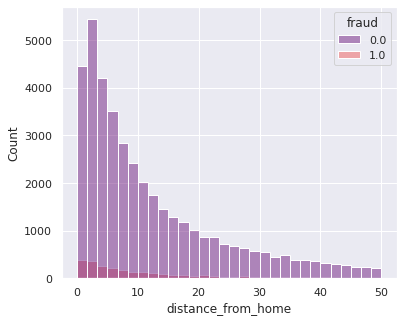

In [44]:
sns.set(rc = {'figure.figsize':(6,5)})

sns.histplot(data=dt, x='distance_from_home', hue='fraud', bins=30, palette='magma')

<AxesSubplot:xlabel='distance_from_last_transaction', ylabel='Count'>

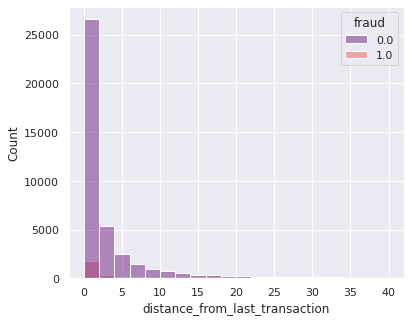

In [45]:
sns.histplot(data=dt, x='distance_from_last_transaction', hue='fraud', bins=20, palette='magma')

<AxesSubplot:xlabel='ratio_to_median_purchase_price', ylabel='Count'>

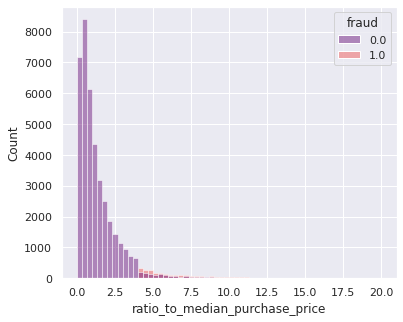

In [46]:
	
sns.histplot(data=dt, x='ratio_to_median_purchase_price', hue='fraud', bins=60, palette='magma')

findings: there is a marked range in which fraud is more likely to be committed

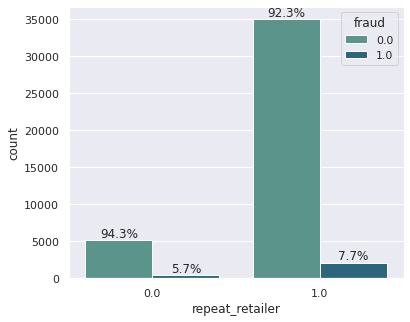

In [47]:
hue_type = dt['fraud'].dtype.type

groups = dt['repeat_retailer'].unique()
proportions = dt.groupby('repeat_retailer')['fraud'].value_counts(normalize=True)

ax = sns.countplot(x='repeat_retailer', hue='fraud', data=dt, palette='crest')

for c in ax.containers:
    labels = [f'{proportions.loc[g, hue_type(c.get_label())]:.1%}' for g in groups]

    ax.bar_label(c, labels)


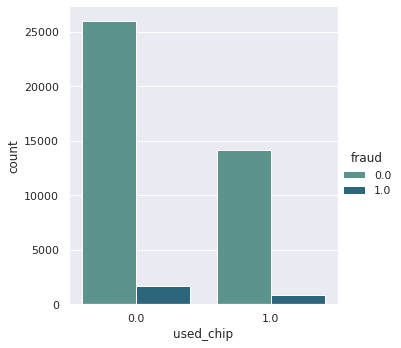

In [48]:
sns.catplot(data=dt, x='used_chip', kind='count', hue='fraud', palette='crest')

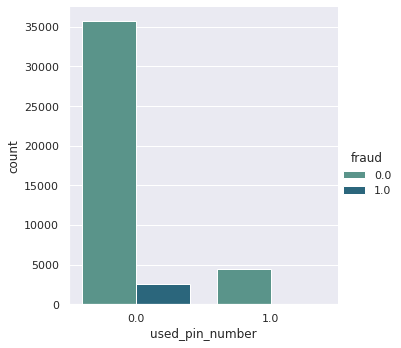

In [49]:
sns.catplot(data=dt, x='used_pin_number', kind='count', hue='fraud', palette='crest')

findings: the number of fauds where the pin is used is null

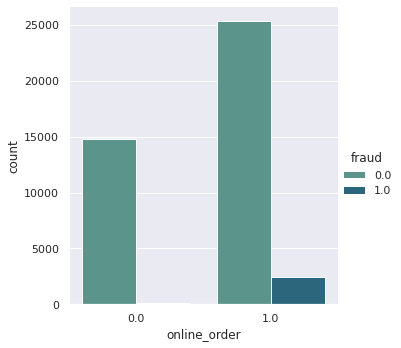

In [50]:
sns.catplot(data=dt, x='online_order', kind='count', hue='fraud', palette='crest')

findings: are much more common to commit in online purchases

machine learning model selection:

In [55]:
dt = pd.read_csv('card_transdata.csv')

In [56]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (accuracy_score, confusion_matrix)


In [57]:
dt.columns

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')

In [58]:
X = dt[['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip', 'used_pin_number', 'online_order']]
y = dt['fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

accuracy:  0.95861


<AxesSubplot:>

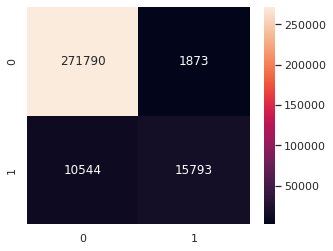

In [26]:
sns.set(rc = {'figure.figsize':(5,4)})

lregressor = LogisticRegression(max_iter=500)
lregressor.fit(X_train, y_train)
y_pred = lregressor.predict(X_test)

acc = accuracy_score(y_pred, y_test)
print('accuracy: ', acc)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')

accuracy:  0.9999866666666667


<AxesSubplot:>

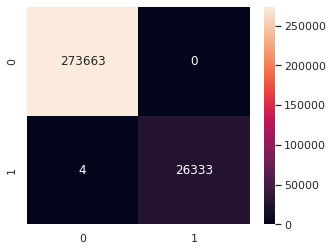

In [27]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)

acc = accuracy_score(y_pred, y_test)
print('accuracy: ', acc)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')

Random Forest Classifier seems to be the perfect model!!